In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import text
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_measure = session.query(measurement.date).\
    order_by(measurement.date.desc()).\
    first()
recent_measure

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = pd.to_datetime(recent_measure[0])

# Calculate the date one year from the last date in data set.
one_year_ago =   dt.date(end_date.year - 1, end_date.month, end_date.day)
one_year_ago 

# Perform a query to retrieve the data and precipitation scores
results =  session.query(measurement.date,measurement.prcp).filter(measurement.date >=one_year_ago)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_sample = pd.DataFrame(results)
# Sort the dataframe by date
year_sample.sort_values(by=0,ascending = True, inplace = True)
# year_sample = year_sample.rename(columns= {0 :'Date',
#                              1 : 'Percipitation'},
#                              inplace = True)

year_sample = year_sample.rename(columns = {0 :'Date',1 : 'Percipitation'})

year_sample 


,Date,Percipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

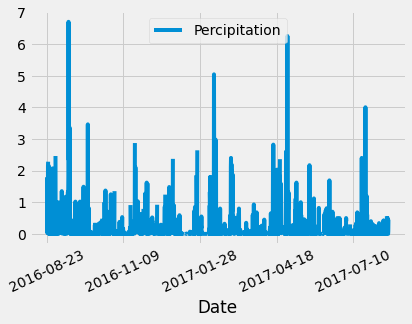

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
year_sample.plot(x='Date',y='Percipitation')
plt.xticks(rotation = 25)

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_sample.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(station).count()
number_stations

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activity_list =  session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).all()
print(activity_list)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
nums = (measurement.station)

most_active_station = [func.min(nums), func.max(nums), func.avg(nums)]



SELECT measurement.station AS measurement_station, min(measurement.station) AS min_1 
FROM measurement SELECT measurement.station AS measurement_station, max(measurement.station) AS max_1 
FROM measurement SELECT measurement.station AS measurement_station, avg(measurement.station) AS avg_1 
FROM measurement


Text(0.5, 4.183333333333314, 'Temperature')

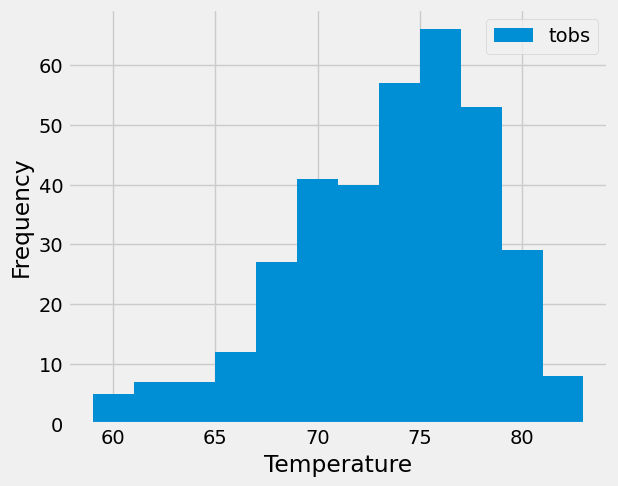

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()